In [2]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import os
from pathlib import Path
from collections import defaultdict

#plt.style.use('seaborn')
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)


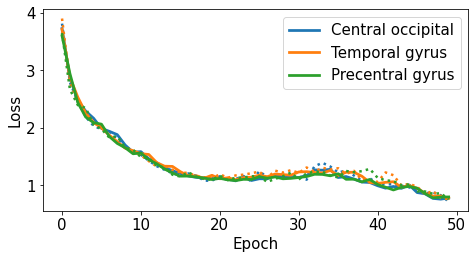

In [26]:
__root__ = os.getcwd()
training_files = [
    'finalresults/scalogram/final/normal_2121/tloss_scalogram.scores',
    'finalresults/scalogram/final/control_0721/tloss_scalogram.scores',
    'finalresults/scalogram/final/control_1331/tloss_scalogram.scores'
]

validation_files = [
    'finalresults/scalogram/final/normal_2121/vloss_scalogram.scores',
    'finalresults/scalogram/final/control_0721/vloss_scalogram.scores',
    'finalresults/scalogram/final/control_1331/vloss_scalogram.scores'
]

training = defaultdict(list)
for tf, key in zip(training_files, ['Central occipital', 'Temporal gyrus', 'Precentral gyrus']):
    with open(tf, 'r') as fpath:
        for line in fpath.readlines():
            training[key].append(float(line.rstrip()))
            
validation = defaultdict(list)
for tf, key in zip(validation_files, ['Central occipital', 'Temporal gyrus', 'Precentral gyrus']):
    with open(tf, 'r') as fpath:
        for line in fpath.readlines():
            validation[key].append(float(line.rstrip()))

fig ,axs = plt.subplots(figsize=(7,4))
for (k1, v1), (k2, v2), clr, mrk in zip(training.items(), validation.items(), 
                                   ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple'],
                                   ['|', 'x', '1', '.']):
    axs.plot(v1, color=clr, label=f'{k1}', linewidth=2.75)
    axs.plot(v2, color=clr, linewidth=2.5, ls=':')
#plt.title(f'Negative control (Scalogram SimCLR)')
axs.set_ylabel('Loss', fontsize=15)
axs.set_xlabel('Epoch', fontsize=15)
axs.legend(prop={'size': 15})
axs.tick_params(axis='x', labelsize=15)
axs.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.savefig('ScalogramSimCLR_MEG-channels-control.svg')
    